# Distributed Coordinate Descent for L1-regularized Logistic Regression

In [1]:
# Import des packages

import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm
from numpy.random import multivariate_normal
from numpy.random import randn
from scipy.linalg.special_matrices import toeplitz

In [2]:
%load_ext autoreload
%autoreload 2
import LogisticLasso

### Simulation des données

In [3]:
# Sélection des paramètres

n = 10000 # Nombre de données
p = 100 # Nombre de features
p_nul = 50 # Nombre de features nulles
inclinaison = 20 # Rapidité de décroissance des features
corr = 0.4 # Correlation des features

lmbd = 10 # Penalisation L1

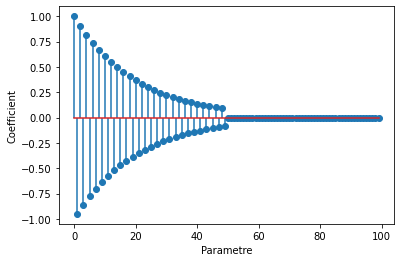

In [4]:
# Génération des coefficients

def simu_coef(p, p_nul, inclinaison):
    index = np.arange(p)
    coefs = ((-1)**index) * np.exp(-index/inclinaison)
    coefs[-p_nul:] = 0
    return coefs
    
coefs = simu_coef(p, p_nul, inclinaison)

plt.stem(coefs)
plt.xlabel("Parametre")
plt.ylabel("Coefficient")
plt.show()

In [5]:
# Simulation des données

def simu_data(n, p, coefs, corr):
    cov = toeplitz(corr ** np.arange(0, p))
    X = multivariate_normal(np.zeros(p), cov, size=n)
    y = np.sign(X.dot(coefs) + randn(n))
    return X, y

X, y = simu_data(n, p, coefs, corr)

### Logistic Regression Scikit-learn

In [6]:
%%time

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty='l1', C=1/lmbd, fit_intercept=False, 
                           solver="saga", tol=1e-6)

model.fit(X,y)

Wall time: 16.2 s


LogisticRegression(C=0.1, fit_intercept=False, penalty='l1', solver='saga',
                   tol=1e-06)

In [7]:
print("Nombre d'itérations :", model.n_iter_)

Nombre d'itérations : [28]


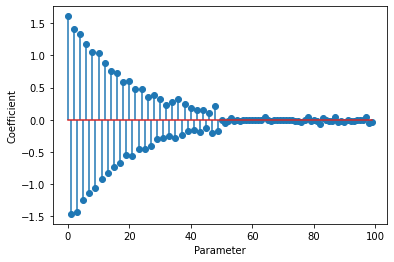

In [8]:
plt.stem(model.coef_[0])
plt.xlabel("Parameter")
plt.ylabel("Coefficient")
plt.show()

In [9]:
# Accuracy
np.sum(model.predict(X)==y)/n

0.8686

##### PGD

In [10]:
model_pgd = LogisticLasso.LogisticLasso("pgd", lmbd, 2000, 1e-6)

In [11]:
%%time
model_pgd.fit(X, y)

Wall time: 23.8 s


In [12]:
print("Nombre d'itérations :", len(model_pgd.objectif_list_))

Nombre d'itérations : 588


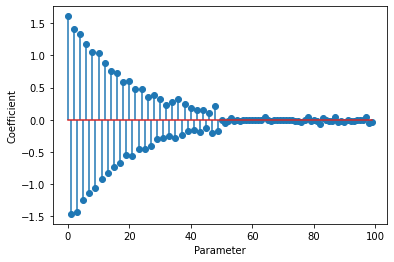

In [13]:
plt.stem(model_pgd.coef_)
plt.xlabel("Parameter")
plt.ylabel("Coefficient")
plt.show()

In [14]:
# Accuracy
np.sum(model_pgd.predict(X)==y)/n

0.8686

##### PGD numba

In [15]:
model_pgd_numba = LogisticLasso.LogisticLasso("pgd_numba", lmbd, 2000, 1e-6)

In [16]:
%%time
model_pgd_numba.fit(X, y)

Wall time: 27.8 s


In [17]:
%%time
model_pgd_numba.fit(X, y)

Wall time: 24.7 s


In [18]:
print("Nombre d'itérations :", len(model_pgd_numba.objectif_list_))

Nombre d'itérations : 588


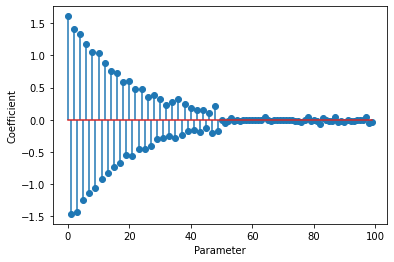

In [19]:
plt.stem(model_pgd_numba.coef_)
plt.xlabel("Parameter")
plt.ylabel("Coefficient")
plt.show()

In [20]:
# Accuracy
np.sum(model_pgd_numba.predict(X)==y)/n

0.8686

##### CD

In [21]:
model_cd = LogisticLasso.LogisticLasso("cd", lmbd, 2000, 1e-6)

In [22]:
%%time
model_cd.fit(X, y)

Wall time: 5.03 s


In [23]:
print("Nombre d'itérations :", len(model_cd.objectif_list_))

Nombre d'itérations : 220


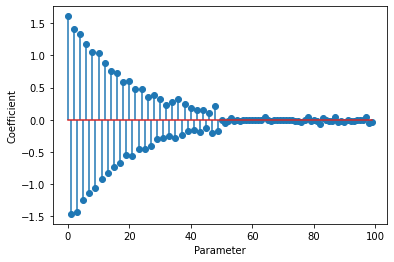

In [24]:
plt.stem(model_cd.coef_)
plt.xlabel("Parameter")
plt.ylabel("Coefficient")
plt.show()

In [25]:
# Accuracy
np.sum(model_cd.predict(X)==y)/n

0.8686

##### CD Numba

In [26]:
model_cd_numba = LogisticLasso.LogisticLasso("cd_numba", lmbd, 2000, 1e-6)

In [27]:
%%time
model_cd_numba.fit(X, y)

Wall time: 3.96 s


In [28]:
%%time
model_cd_numba.fit(X, y)

Wall time: 3.12 s


In [29]:
print("Nombre d'itérations :", len(model_cd_numba.objectif_list_))

Nombre d'itérations : 220


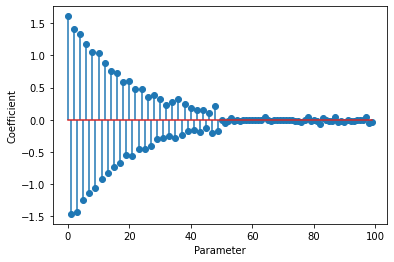

In [30]:
plt.stem(model_cd_numba.coef_)
plt.xlabel("Parameter")
plt.ylabel("Coefficient")
plt.show()

In [31]:
# Accuracy
np.sum(model_cd_numba.predict(X)==y)/n

0.8686

### Verification

In [32]:
# Scikit-learn vs PGD
print(np.max(np.abs(np.around(model.coef_[0] - model_pgd.coef_, decimals=6))))

6.4e-05


In [33]:
# PGD vs PGD numba
np.around(model_pgd.coef_, decimals=6) == np.around(model_pgd_numba.coef_, decimals=6)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [34]:
# Scikit-learn vs CD
print(np.max(np.abs(np.around(model.coef_[0] - model_cd.coef_, decimals=6))))

2.1e-05


In [35]:
# CD vs CD numba
np.around(model_cd.coef_, decimals=6) == np.around(model_cd_numba.coef_, decimals=6)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])